In [1]:
#import warnings
#warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import acquire
import wrangle_mall
np.random.seed(4)
from matplotlib import style
style.use('ggplot')


In [2]:
# get iris data
iris = acquire.get_iris_data()


Reading from csv...


In [3]:
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


1. Clustering with the Iris Dataset
Using this lesson as a guide, perform clustering on the iris dataset.



        a. Choose features other than the ones used in the lesson.


In [4]:
X = iris[['petal_length', 'petal_width']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.predict(X)
iris['cluster'] = kmeans.predict(X)

        b. Visualize the results of your clustering.


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

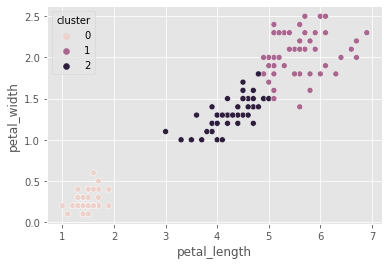

In [5]:
# make a scatter plot of the iris data hue by cluster
sns.scatterplot(x='petal_length', y='petal_width', hue='cluster', data=iris)

        c. Use the elbow method to visually select a good value for k.


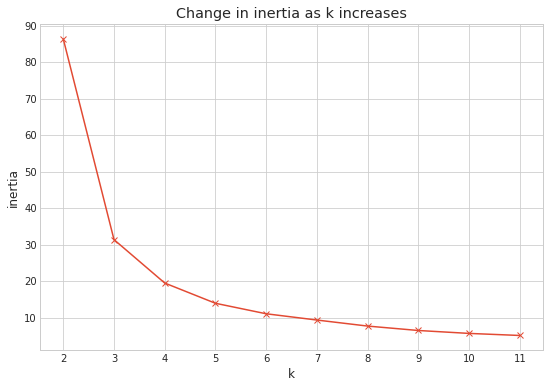

In [6]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

        d. Repeat the clustering, this time with 3 different features.


In [7]:
X = iris[['petal_length', 'petal_width', 'sepal_length']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.predict(X)
iris['cluster'] = kmeans.predict(X)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

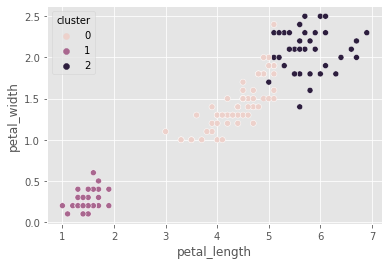

In [8]:
# make a scatter plot of the iris data hue by cluster
sns.scatterplot(x='petal_length', y='petal_width', hue='cluster', data=iris)

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



In [9]:
# get mall data
mall = wrangle_mall.get_mall_data()

Reading from csv...


In [10]:
mall.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
# convert categorical variables to dummy variables
mall = wrangle_mall.encode_categoricals(mall)

In [12]:
mall.head()


,age,annual_income,spending_score,gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


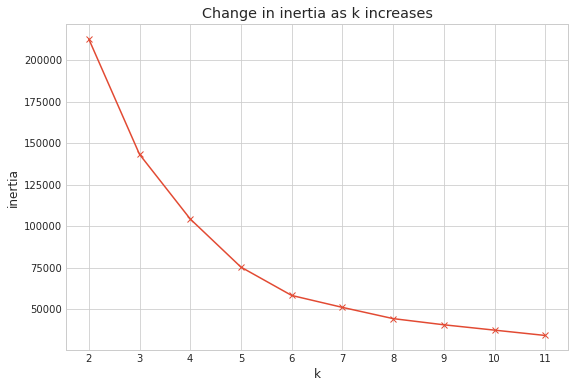

In [13]:
X = mall[['gender_Male', 'age', 'annual_income', 'spending_score']]

# lets determine a good k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [14]:
cols = ['age', 'annual_income', 'spending_score']
X = mall[cols]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.predict(X)
mall['cluster'] = kmeans.predict(X)

<AxesSubplot:xlabel='age', ylabel='spending_score'>

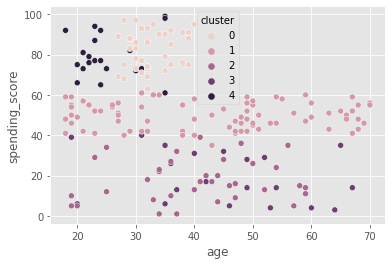

In [15]:
# make a scatter plot of the mall data hue by cluster
sns.scatterplot(x='age', y='spending_score', hue='cluster', data=mall)


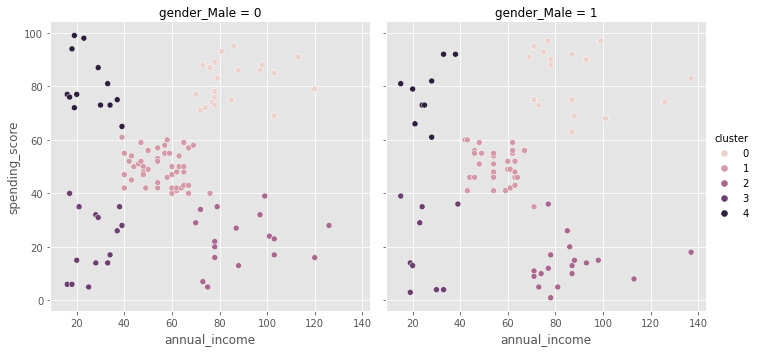

In [16]:
# make a scatter plot of the mall data hue by cluster
sns.relplot(x='annual_income', y='spending_score', hue='cluster', data=mall, col = 'gender_Male')

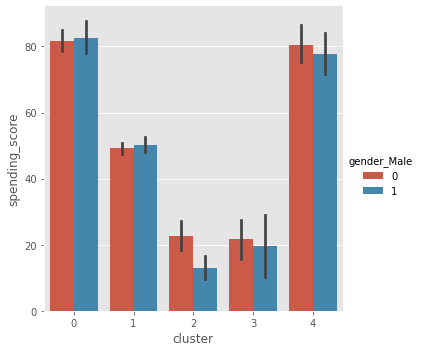

In [17]:
sns.catplot(data=mall, hue='gender_Male', y='spending_score', x='cluster', kind='bar')

3. How does scaling impact the results of clustering?


In [18]:
mall_scaled,_,_ = wrangle_mall.scale_numerical(mall,mall,mall)

In [19]:
cols = ['annual_income', 'spending_score']
X = mall_scaled[cols]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.predict(X)
mall['cluster'] = kmeans.predict(X)

Text(0.5, 0.98, 'scaled with standard scaler')

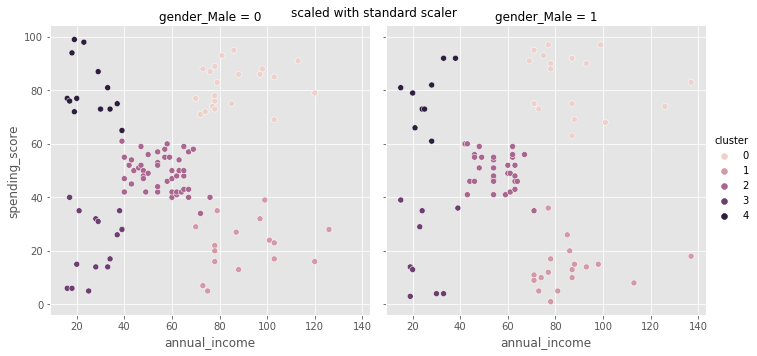

In [20]:
rel = sns.relplot(x='annual_income', y='spending_score', hue='cluster', data=mall, col = 'gender_Male')
rel.fig.suptitle('scaled with standard scaler')



Text(0.5, 0.98, 'scaled with MinMaxScaler')

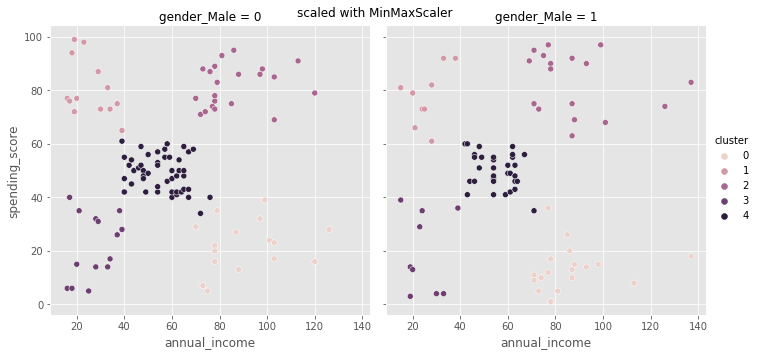

In [21]:
mall_scaled, _,_ = wrangle_mall.scale_numerical(mall, mall, mall, scaler=MinMaxScaler())
cols = ['annual_income', 'spending_score']
X = mall_scaled[cols]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.predict(X)
mall['cluster'] = kmeans.predict(X)
rel = sns.relplot(x='annual_income', y='spending_score', hue='cluster', data=mall, col = 'gender_Male')
rel.fig.suptitle('scaled with MinMaxScaler')

Text(0.5, 0.98, 'scaled with MinMaxScaler')

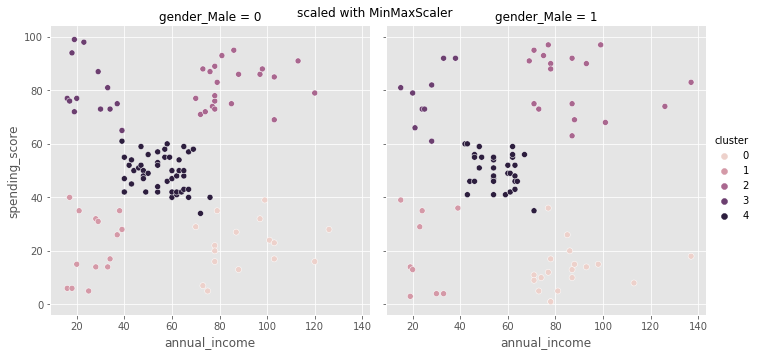

In [22]:
mall_scaled, _,_ = wrangle_mall.scale_numerical(mall, mall, mall, scaler=RobustScaler())
cols = ['annual_income', 'spending_score']
X = mall_scaled[cols]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.predict(X)
mall['cluster'] = kmeans.predict(X)
rel = sns.relplot(x='annual_income', y='spending_score', hue='cluster', data=mall, col = 'gender_Male')
rel.fig.suptitle('scaled with MinMaxScaler')



Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.



# Bonus
   

 a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
   

In [23]:
# read data from cluster_data.csv
df = pd.read_csv('cluster_data.csv')
df.head()


,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


 b) Visualize the data and guess the number and shape of the clusters.
   

<AxesSubplot:xlabel='x', ylabel='y'>

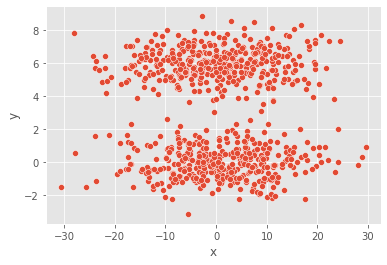

In [24]:
# make a scatterplot for df
sns.scatterplot(data=df, x= 'x', y='y')
# looks like 2 clusters




 c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
   

In [25]:
X = df[['x', 'y']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans.predict(X)
df['cluster'] = kmeans.predict(X)

<AxesSubplot:xlabel='x', ylabel='y'>

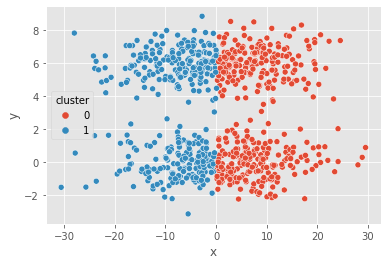

In [26]:
# make a scatter plot of the df data hue by cluster
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

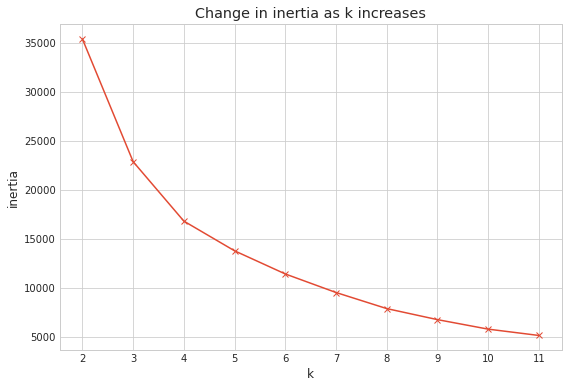

In [27]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

<AxesSubplot:xlabel='x', ylabel='y'>

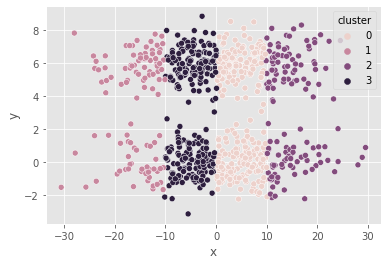

In [28]:
X = df[['x', 'y']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
kmeans.predict(X)
df['cluster'] = kmeans.predict(X)
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

 d) Repeat the step above but with scaled data.
    

<AxesSubplot:xlabel='x', ylabel='y'>

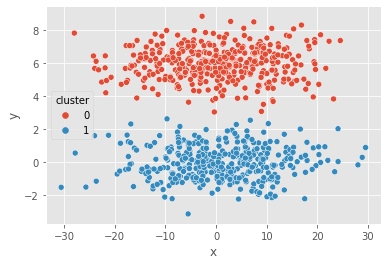

In [29]:
df_scaled, _,_ = wrangle_mall.scale_numerical(df, df, df,MinMaxScaler())
X = df_scaled[['x', 'y']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans.predict(X)
df['cluster'] = kmeans.predict(X)
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

Text(0.5, 0.98, 'scaled with MinMaxScaler')

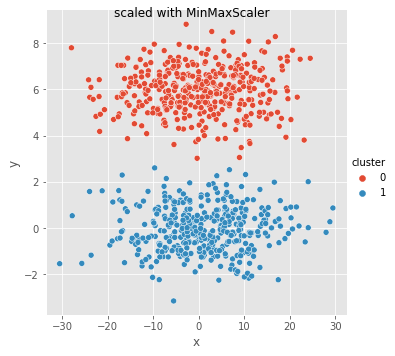

In [30]:
df_scaled, _,_ = wrangle_mall.scale_numerical(df, df, df, scaler=MinMaxScaler())
cols = ['x', 'y']
X = df_scaled[cols]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans.predict(X)
df['cluster'] = kmeans.predict(X)
rel = sns.relplot(x='x', y='y', hue='cluster', data=df)
rel.fig.suptitle('scaled with MinMaxScaler')

Text(0.5, 0.98, 'scaled with RobustScaler')

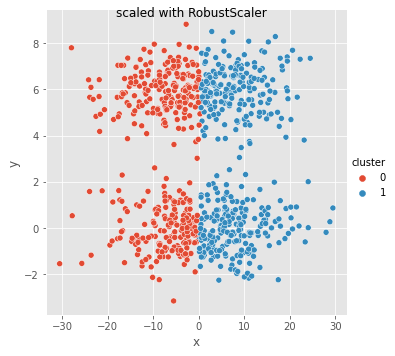

In [31]:
df_scaled, _,_ = wrangle_mall.scale_numerical(df, df, df, scaler=RobustScaler())
cols = ['x', 'y']
X = df_scaled[cols]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans.predict(X)
df['cluster'] = kmeans.predict(X)
rel = sns.relplot(x='x', y='y', hue='cluster', data=df)
rel.fig.suptitle('scaled with RobustScaler')

Text(0.5, 0.98, 'scaled with StandardScaler')

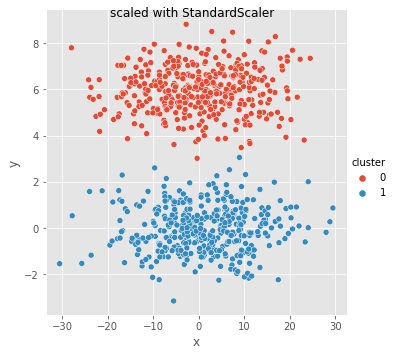

In [32]:
df_scaled, _,_ = wrangle_mall.scale_numerical(df, df, df, scaler=StandardScaler())
cols = ['x', 'y']
X = df_scaled[cols]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans.predict(X)
df['cluster'] = kmeans.predict(X)
rel = sns.relplot(x='x', y='y', hue='cluster', data=df)
rel.fig.suptitle('scaled with StandardScaler')

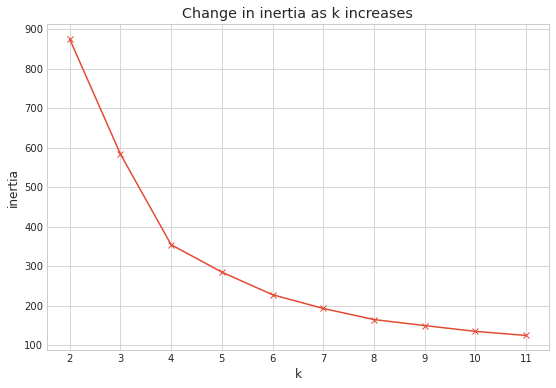

In [33]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

e) Write down the takeaways from this exercise.

scaling and scaler matter
the elbow method is a good way to find the best k.
df.copy() is a good way to copy a dataframe so the original dataframe is not modified.

'''